### **Perceptron**

In [184]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [ ]:
!git remote add origin

In [1]:
import numpy as np

In [161]:
import tensorflow as tf
from tqdm import tqdm

In [179]:
def accuracy(y_true, y_pred):
  acuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

def unit_step_funciton(x):
  return np.where(x > 0, 1, 0)

def dist(distribution, n_features):
  if distribution == "random":
    w = np.random.randn(n_features)
  if distribution == "gaussian":
    w = np.random.normal(0, 0.01,n_features)
  if distribution == "uniform":
    w = np.random.uniform(0, 0.01,n_features)
  return w

In [182]:
class Perceptron:
  def __init__(self, distribution, learning_rate=0.01, n_iters=1000):
    self.weights = None
    self.bias = None
    self.lr = learning_rate
    self.n_iters = n_iters
    self.activation_func = unit_step_funciton
    self.distribution = distribution

  # to train the precptron with X.shape number of samples
  def fit(self, X, y):
    n_sample, n_features = X.shape
    self.weights = dist(self.distribution, n_features)
    self.bias = dist(self.distribution, 1)
    y_ = np.where(y > 0, 1, 0)

    for _ in tqdm(range(self.n_iters)):
      for idx, x_i in enumerate(X):
        # forward pass
        z = np.dot(x_i, self.weights) + self.bias
        y_hat = self.activation_func(z)
        # update
        self.weights = self.lr * (y_hat - y[idx]) * x_i
        self.bias = self.lr * (y_hat - y[idx])


  def predict(self, X):
    # just a foward pass is enough for it
    z = np.dot(X, self.weights) * self.bias
    y_hat = self.activation_func(z)
    return y_hat

100%|██████████| 1000/1000 [00:02<00:00, 459.21it/s]


[1 1 1 1 1 1 1 1 1 1]
Perceptron classification accuracy <function accuracy at 0x7d4bed4c5090>


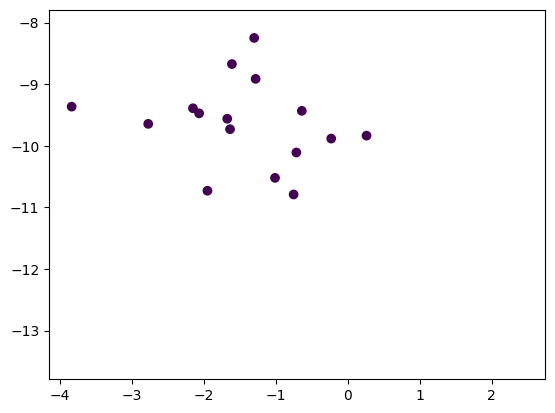

In [183]:
# Testing out code
if __name__ == "__main__":
  import matplotlib.pyplot as plt
  from sklearn.model_selection import train_test_split
  from sklearn import datasets

  X, y = datasets.make_blobs(
      n_samples = 50, n_features = 2, centers = 2, cluster_std = 1.05, random_state = 2
  )
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 123)

  p = Perceptron("uniform", learning_rate = 0.01, n_iters = 1000)
  p.fit(X_train, y_train)
  predictions = p.predict(X_test)
  print(predictions)
  print("Perceptron classification accuracy", accuracy(y_test, predictions))

  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  plt.scatter(X_train[:,0], X_train[:,1], marker="o", c = y_train)
  x0_1 = np.amin(X_train[:,0])
  x0_2 = np.amin(X_train[:,0])

  x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
  x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

  ax.plot([x0_1, x0_2],[x1_1, x1_2], "k")
  ymin = np.amin(X_train[:,1])
  ymax = np.amin(X_train[:,1])
  ax.set_ylim([ymin - 3, ymax + 3])
  plt.show()

In [172]:
print(predictions.shape)

(10,)
